num of model params 21840
Epoch [1/5], Accu:78.5700 Loss: 0.6818
Epoch [2/5], Accu:90.2617 Loss: 0.3282
Epoch [3/5], Accu:92.4233 Loss: 0.2593
Epoch [4/5], Accu:93.2433 Loss: 0.2295
Epoch [5/5], Accu:93.9617 Loss: 0.2084


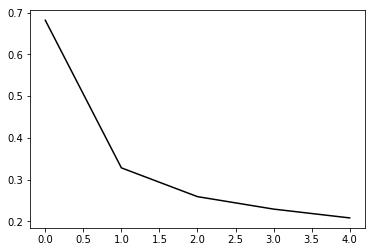

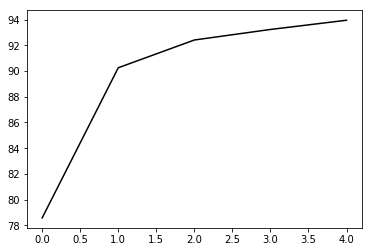

Accuracy of the network on the 10000 test images: 94 %


In [6]:
import os, sys
sys.path.append('..')
from utility import *
import matplotlib.pyplot as plt
import numpy as np

# Hyper Parameters 
input_size    = 784
hidden_size   = 500
num_classes   = 10
num_epochs    = 5
batch_size    = 100
learning_rate = 0.001
num_model     = 0

# MNIST Dataset 
train_dataset, test_dataset = fetch_mnist_data(dir='../data')

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

exec('net = CNN_Net%s().cuda().double() ' % num_model)
    

print("num of model params %d" % model_params(net))
    
criterion = nn.CrossEntropyLoss().cuda() 
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)  

##################################################################################################
loss_total = []
accu_total = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_correct = 0
    
    test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        #images = Variable(images.view(-1, 28*28))
        images = Variable(images.type(torch.DoubleTensor)).cuda()
        labels = Variable(labels.type(torch.LongTensor)).cuda()
        
        optimizer.zero_grad()
        outputs = net(images)
        _, pred = torch.max(outputs.data, 1)
        
        loss = criterion(outputs, labels)
        loss.backward()
    
        running_correct += torch.sum(pred == labels.data)
        running_loss += loss.data[0]
        
        optimizer.step()
        
    cur_accu = running_correct/len(train_loader)
    cur_loss = running_loss/len(train_loader)
    
    loss_total.append(cur_loss)
    accu_total.append(cur_accu)
    print ('Epoch [%d/%d], Accu:%.4f Loss: %.4f' % (epoch+1, num_epochs, cur_accu, cur_loss))
    

plt.figure(1)
plt.plot(loss_total, 'k')
plt.figure(2)
plt.plot(accu_total, 'k')        
plt.show()
    
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    #images = Variable(images.view(-1, 28*28))
    images = Variable(images.type(torch.DoubleTensor)).cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu().numpy() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Model
torch.save(net.state_dict(), 'model.pkl') #net.load_state_dict(torch.load('model.pkl'))